# Modelo Autoregressivo (AR)

In [1]:
from pandas import read_csv
from matplotlib import pyplot

### Conjunto de dados de temperaturas mínimas diárias

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


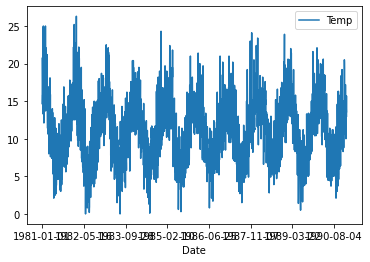

In [2]:
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

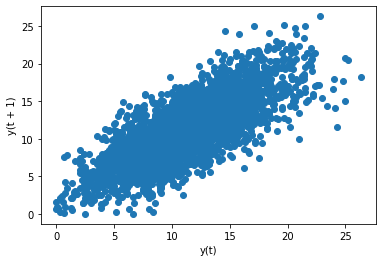

In [3]:
from pandas.plotting import lag_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
lag_plot(series,lag=1)
pyplot.show()

### Coeficiente de Pearson

In [4]:
from pandas import DataFrame
from pandas import concat

values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


### Gráficos de Autocorrelação

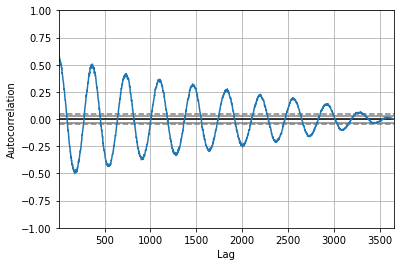

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

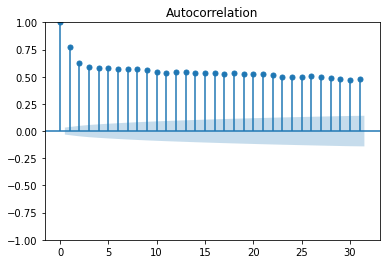

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
plot_acf(series, lags=31)
pyplot.show()

### Modelo de Persistencia

In [7]:
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [8]:
# persistence model
def model_persistence(x):
    return x

In [9]:
from sklearn.metrics import mean_squared_error
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 3.423


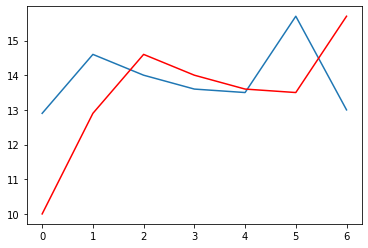

In [10]:
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Modelo de Autoregressão (AR)

In [11]:
from statsmodels.tsa.ar_model import AutoReg

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


In [12]:
from math import sqrt
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


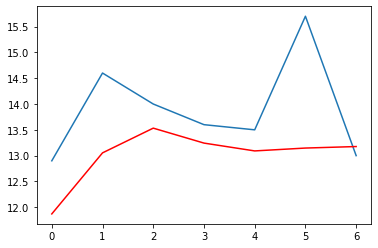

In [13]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Exercício

Consumo de agua usando o Dataset "WaterConsumption.csv"